In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

/usr/local/lib/python3.8/dist-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
df  = pd.read_csv("Housing.csv")

In [3]:
df.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
from sklearn.preprocessing import LabelEncoder

In [5]:
le  = LabelEncoder()

In [6]:
col_encode = ['mainroad','guestroom','basement', 'hotwaterheating' ,'airconditioning' ,	'prefarea' ,	'furnishingstatus']

In [7]:
for col in col_encode:
    df[col] = le.fit_transform(df[col])

In [8]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,2
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,2
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0


In [9]:
x = df.iloc[:,1:]

In [10]:
x


,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,1,0,0,0,1,2,1,0
1,8960,4,4,4,1,0,0,0,1,3,0,0
2,9960,3,2,2,1,0,1,0,0,2,1,1
3,7500,4,2,2,1,0,1,0,1,3,1,0
4,7420,4,1,2,1,1,1,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,1,0,1,0,0,2,0,2
541,2400,3,1,1,0,0,0,0,0,0,0,1
542,3620,2,1,1,1,0,0,0,0,0,0,2
543,2910,3,1,1,0,0,0,0,0,0,0,0


In [11]:
y = df.iloc[:,0]

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x_train,x_test,y_train,y_test  = train_test_split(x,y,test_size = 0.25,random_state = 40)

In [14]:
model = LinearRegression()

In [15]:
model.fit(x_train,y_train)


LinearRegression()

In [16]:
y_predict = model.predict(x_test)
mse = mean_squared_error(y_test,y_predict)

In [17]:
r2 =  r2_score(y_test ,y_predict)

In [18]:
print(y_predict)
print(f'Intercept = { model.intercept_}')
print(f'coefficiants = { model.coef_}')
print(f'MSE = {mse}')
print(f'r2 score = {r2}')

[7144776.26390643 6455954.47794    7925694.83019867 3313799.57996774
 4923273.52990092 2850528.13828414 4974060.43381919 3872014.23165963
 6233391.53045681 2992332.90521561 6404423.35706183 3294473.47801381
 3286682.71781433 3021546.90987694 7929474.38732079 2523986.05145751
 5282553.64815681 7342397.02854027 4248987.73761956 2812090.89420575
 3413053.74841504 3114311.50958888 3473010.9931972  5585113.50131697
 2906955.11052673 2282415.15191152 4224215.69955678 5046596.46243636
 3537360.95278422 3863092.00008696 4334074.30562331 6464016.34368072
 6937775.5790573  3235183.3428132  6852570.66487821 3383867.22005249
 3311981.68741219 5605238.04790532 3875193.46688009 2938732.66681013
 5783618.97474094 4511248.92678523 7168690.92904051 5856293.62820302
 6688214.95050791 5175938.47181168 3318615.17144785 6592037.57092875
 6144091.63135525 5016573.32843679 7239051.11858652 4121152.55652403
 4356775.61369415 6530773.90298107 7621437.67307658 6184304.79147949
 6398976.88414001 4855524.64397043

In [19]:
mse

1699319415288.2285

In [20]:
r2

0.6268207095464189

In [21]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,2
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,2
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0


In [33]:
test = [9960 	,3, 	2 	,2 	,1 ,	0 	,1, 	0, 	0 	,2 	,1 ,	1]

In [34]:
test

[9960, 3, 2, 2, 1, 0, 1, 0, 0, 2, 1, 1]

In [35]:
import numpy as np
test = pd.DataFrame(te)

In [36]:
pred = model.predict(test)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [37]:
pred

array([7353051.23795362])

ValueError: x and y must be the same size

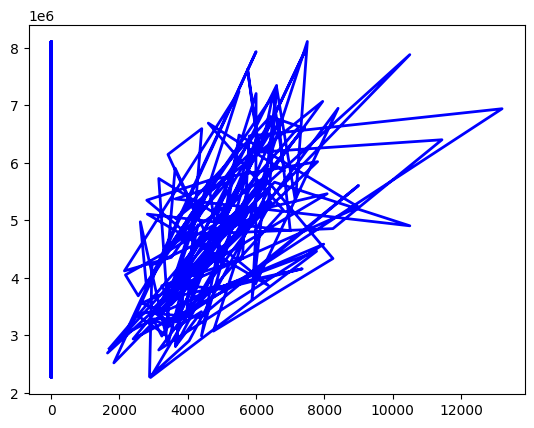

In [38]:
plt.plot(x_test,y_predict,color='blue',linewidth=2,label='Predicted line')
plt.scatter(x,y,color='red')